In [1]:
import numpy as np
import cv2,os,h5py
import scipy.io
import matplotlib.pyplot as plt
from keras.models import load_model

Using TensorFlow backend.


Couldn't import dot_parser, loading of dot files will not be possible.


In [2]:
def rgb2gray(rgb):
    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
    return gray

Give the path to image, load and predict the model

In [3]:
img_path = '../dataset/test_images/2017266.jpg' 

In [4]:
#load the model it takes 224 X 224 patch of the image as input
model = load_model('../model/model_mscn.h5',compile=False)
windowsize_r = 224
windowsize_c = 224

In [5]:
%%time
img1 = cv2.imread(img_path)
h,l,c = img1.shape
img = np.transpose(img1,(2,0,1)) #channel first
a=np.zeros((c,(h//224)*224,(l//224)*224))
for i in range(0,h//224):
    for j in range(0,l//224):
        image = img[:,i*224:(i+1)*224,j*224:(j+1)*224]/255.0
        image = image.reshape((1,3,224,224))
        pred_img = model.predict(image)
        pred_img = pred_img.squeeze()
        a[:,i*224:(i+1)*224,j*224:(j+1)*224] += pred_img

CPU times: user 6.86 s, sys: 1.48 s, total: 8.34 s
Wall time: 11.7 s


In [6]:
DistMap = np.transpose(a,(1,2,0))
DistMap = rgb2gray(DistMap)

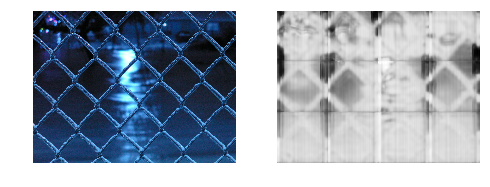

In [7]:
fig, (ax1, ax2) = plt.subplots(figsize=(8, 3), ncols=2)
ax1.axis('off')
ax2.axis('off')
ax1.imshow(img1)
ax2.imshow(DistMap,cmap='gray')